# Question 2:
* Which problems can be solved quickly but have not been solved?
* Can you pinpoint the reason why? 
* Note: Only for Bangkok

# Import Libraries

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

# Functions

In [2]:
import numpy as np
def makeList(x):
    if isinstance(x,list):
        return x
    elif isinstance(x,str):
        return x.split(',')
    else: return np.nan

# the_df.type = the_df.type.apply(makelist)
# the_df = the_df.explode('type')

In [3]:
import requests
def reverse_geocode(lat, lng, api_key):
    # Base URL for the API
    url = "https://maps.googleapis.com/maps/api/geocode/json"
    
    # Parameters for the request
    params = {
        "latlng": f"{lat},{lng}",
        "key": api_key
    }
    
    # Make the GET request
    response = requests.get(url, params=params)
    
    # Parse the JSON response
    if response.status_code == 200:
        data = response.json()
        if data.get('results'):
            return data['results'][0]['formatted_address']
        else:
            return "No address found for the given coordinates."
    else:
        return f"Error: {response.status_code}, {response.text}"

# Example usage
latitude = 100.48093
longitude = 13.75001
your_api_key = "YOUR_API_KEY"
address = reverse_geocode(latitude, longitude, your_api_key)
print(f"Address: {address}")

Address: Error: 400, {
   "error_message" : "Invalid request. Invalid 'latlng' parameter.",
   "results" : [],
   "status" : "INVALID_REQUEST"
}


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.3.0) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [4]:
import requests
def get_location_from_coordinates(lat, lon):
    url = f"https://nominatim.openstreetmap.org/reverse"
    params = {
        'lat': lat,
        'lon': lon,
        'format': 'json',
    }
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        address = data.get("address", {})
        region = address.get("state", "Region not found")
        province = address.get("county", "Province not found")
        return region, province
    else:
        return None, None

# Example usage
latitude = 100.5018
longitude = 13.7563
region, province = get_location_from_coordinates(latitude, longitude)
print(f"Region: {region}, Province: {province}")


Region: None, Province: None


In [5]:
import geopy
from geopy.geocoders import Nominatim 
import ssl
import certifi
from geopy.adapters import AioHTTPAdapter
from geopy.geocoders import options
def get_location_with_geopy(lat, lon):
    ctx = ssl.create_default_context(cafile=certifi.where())
    geopy.geocoders.options.default_ssl_context = ctx   
    geolocator = Nominatim(user_agent="geoapi")
    location = geolocator.reverse((lat, lon), language="en")
    if location and location.raw.get("address"):
        address = location.raw["address"]
        region = address.get("state", "Region not found")
        province = address.get("county", "Province not found")
        return region, province
    return None, None

# Example usage
latitude = 13.7563
longitude = 100.5018 
region, province = get_location_with_geopy(latitude, longitude)
print(f"Region: {region}, Province: {province}")

Region: Region not found, Province: Province not found


# Consider by Types

### Exploding types

In [6]:
# combined_df = pd.read_csv('Combined_Cases_And_Logs.csv')
combined_df_bkk = pd.read_csv('Combined_Cases_And_Logs_Bangkok.csv')

In [7]:
# combined_df['province'].value_counts()
combined_df_bkk['province'].value_counts()

province
กรุงเทพมหานคร    624020
Name: count, dtype: int64

In [8]:
# combined_df['province'].value_counts().reset_index().to_csv("combined_df['province'].value_counts().reset_index().csv", index=False)

In [9]:
# combined_df.shape
combined_df_bkk.shape

(624020, 17)

In [10]:
# combined_df.head()
combined_df_bkk.head()

,ticket_id,type,organization_action,comment,coords,address,subdistrict,district,province,state,star,count_reopen,last_activity,view_count,timestamp_reported,timestamp_finish,duration
0,2024-ANZFC6,แท็กซี่/รถเมล์,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...,"100.57357,13.72769",748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...,คลองตัน,คลองเตย,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 19:38:45,14.0,2024-12-11 19:09:27,2024-12-11 19:39:27,0 days 00:30:00
1,2024-ZCBDC7,ความสะอาด,"ฝ่ายรักษาความสะอาดฯ เขตสัมพันธวงศ์, เขตสัมพันธ...",เรื่องขยะที่มาแยกขยะที่ถนนเยาวราช ก่อนถึงปากซอ...,"100.5059,13.74345",222 ถ. เยาวราช แขวงจักรวรรดิ์ เขตสัมพันธวงศ์ ก...,สัมพันธวงศ์,สัมพันธวงศ์,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 18:57:33,0.0,2024-12-11 16:36:10,2024-12-11 18:58:10,0 days 02:22:00
2,2024-LMV2YC,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",จอดกึดขวางเหมือนเดิมทุกวัน ทุกเวลาครับ,"100.56348,13.73007",อาคาร Mille Malle ซอย สุขุมวิท 20 ถ. สุขุมวิท ...,คลองเตย,คลองเตย,กรุงเทพมหานคร,finish,5.0,0.0,2024-12-11 16:11:09,7.0,2024-12-11 15:52:44,2024-12-11 16:11:44,0 days 00:19:00
3,MPA9A3,เสียง,"ฝ่ายปกครอง เขตธนบุรี, เขตธนบุรี, กรุงเทพมหานคร...",ปัญหา: บริเวณวัดกัลยาณ์ พบช่วงเทศกาลจะมีการจุด...,"100.49133,13.74001",371 ซอย วัดกัลยาณ์ แขวงวัดกัลยา เขตธนบุรี กรุง...,วัดกัลยาณ์,ธนบุรี,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 16:16:37,0.0,2024-12-11 15:50:52,2024-12-11 16:16:52,0 days 00:26:00
4,2024-H4HK7T,หาบเร่แผงลอย,"ฝ่ายเทศกิจ เขตจตุจักร, เขตจตุจักร, กรุงเทพมหานคร",บนสกายวอร์กหน้าห้างยูเนียนมอล์ ตั้งแผงกีดขวางค...,"100.56074,13.8144",30 ถนนพหลโยธิน แขวงจตุจักร เขตจตุจักร กรุงเทพม...,จตุจักร,จตุจักร,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 19:15:26,2.0,2024-12-11 15:16:16,2024-12-11 19:16:16,0 days 04:00:00


In [11]:
# combined_df['type'].value_counts()
combined_df_bkk['type'].value_counts()

type
อื่นๆ                                             115756
ทางเท้า                                            93539
ผิดกฎจราจร                                         40009
จุดเสี่ยง,ความปลอดภัย                              34433
ถนน,ผิดกฎจราจร                                     29823
                                                   ...  
อื่นๆ,น้ำท่วม,คนเร่ร่อน                                1
ควันดำ,แท็กซี่/รถเมล์                                  1
ถนน ทางเท้า ที่จอดรถ,ทางเท้า,อาคารสถานที่ชำรุด         1
อื่นๆ,ควันดำ,สายสื่อสาร,ฝุ่นควัน&กลิ่น&PM2.5           1
ถนน,ความสะอาด,จุดเสี่ยง,ความปลอดภัย                    1
Name: count, Length: 982, dtype: int64

In [12]:
# combined_df[combined_df['type'] =='อื่นๆ,น้ำท่วม,คนเร่ร่อน']
combined_df_bkk[combined_df_bkk['type'] =='อื่นๆ,น้ำท่วม,คนเร่ร่อน']

,ticket_id,type,organization_action,comment,coords,address,subdistrict,district,province,state,star,count_reopen,last_activity,view_count,timestamp_reported,timestamp_finish,duration
286899,2023-NUPL4X,"อื่นๆ,น้ำท่วม,คนเร่ร่อน","เขตปทุมวัน, สำนักการระบายน้ำ กทม., เพื่อนชัชชา...",น้ำท่วมขัง,"100.54015,13.74261",151/1 ถนน ราชดำริ แขวง ลุมพินี เขตปทุมวัน กรุง...,ลุมพินี,ปทุมวัน,กรุงเทพมหานคร,finish,5.0,0.0,2023-09-26 09:17:15,0.0,2023-09-25 15:26:24,2023-09-26 09:17:24,0 days 17:51:00


In [13]:
# combined_exploded_df = combined_df.copy()
combined_exploded_df_bkk = combined_df_bkk.copy()

In [14]:
# combined_exploded_df['type'] = combined_exploded_df['type'].apply(makeList)
combined_exploded_df_bkk['type'] = combined_exploded_df_bkk['type'].apply(makeList)

In [15]:
# combined_exploded_df['type'].value_counts()
combined_exploded_df_bkk['type'].value_counts()

type
[อื่นๆ]                                               115756
[ทางเท้า]                                              93539
[ผิดกฎจราจร]                                           40009
[จุดเสี่ยง, ความปลอดภัย]                               34433
[ถนน, ผิดกฎจราจร]                                      29823
                                                       ...  
[อื่นๆ, น้ำท่วม, คนเร่ร่อน]                                1
[ควันดำ, แท็กซี่/รถเมล์]                                   1
[ถนน ทางเท้า ที่จอดรถ, ทางเท้า, อาคารสถานที่ชำรุด]         1
[อื่นๆ, ควันดำ, สายสื่อสาร, ฝุ่นควัน&กลิ่น&PM2.5]          1
[ถนน, ความสะอาด, จุดเสี่ยง, ความปลอดภัย]                   1
Name: count, Length: 982, dtype: int64

In [16]:
# combined_exploded_df[combined_exploded_df['ticket_id'] == '2023-NUPL4X']
combined_exploded_df_bkk[combined_exploded_df_bkk['ticket_id'] == '2023-NUPL4X']

,ticket_id,type,organization_action,comment,coords,address,subdistrict,district,province,state,star,count_reopen,last_activity,view_count,timestamp_reported,timestamp_finish,duration
286899,2023-NUPL4X,"[อื่นๆ, น้ำท่วม, คนเร่ร่อน]","เขตปทุมวัน, สำนักการระบายน้ำ กทม., เพื่อนชัชชา...",น้ำท่วมขัง,"100.54015,13.74261",151/1 ถนน ราชดำริ แขวง ลุมพินี เขตปทุมวัน กรุง...,ลุมพินี,ปทุมวัน,กรุงเทพมหานคร,finish,5.0,0.0,2023-09-26 09:17:15,0.0,2023-09-25 15:26:24,2023-09-26 09:17:24,0 days 17:51:00


In [17]:
# combined_exploded_df = combined_exploded_df.explode('type') # specify the column to explode
# This means there will be multiple rows with same ticket_id for the ones with multiple types.

combined_exploded_df_bkk = combined_exploded_df_bkk.explode('type') # specify the column to explode
# This means there will be multiple rows with same ticket_id for the ones with multiple types.

In [18]:
# combined_exploded_df.shape
combined_exploded_df_bkk.shape

(896289, 17)

In [19]:
# combined_exploded_df.head()
combined_exploded_df_bkk.head()

,ticket_id,type,organization_action,comment,coords,address,subdistrict,district,province,state,star,count_reopen,last_activity,view_count,timestamp_reported,timestamp_finish,duration
0,2024-ANZFC6,แท็กซี่/รถเมล์,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...,"100.57357,13.72769",748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...,คลองตัน,คลองเตย,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 19:38:45,14.0,2024-12-11 19:09:27,2024-12-11 19:39:27,0 days 00:30:00
1,2024-ZCBDC7,ความสะอาด,"ฝ่ายรักษาความสะอาดฯ เขตสัมพันธวงศ์, เขตสัมพันธ...",เรื่องขยะที่มาแยกขยะที่ถนนเยาวราช ก่อนถึงปากซอ...,"100.5059,13.74345",222 ถ. เยาวราช แขวงจักรวรรดิ์ เขตสัมพันธวงศ์ ก...,สัมพันธวงศ์,สัมพันธวงศ์,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 18:57:33,0.0,2024-12-11 16:36:10,2024-12-11 18:58:10,0 days 02:22:00
2,2024-LMV2YC,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",จอดกึดขวางเหมือนเดิมทุกวัน ทุกเวลาครับ,"100.56348,13.73007",อาคาร Mille Malle ซอย สุขุมวิท 20 ถ. สุขุมวิท ...,คลองเตย,คลองเตย,กรุงเทพมหานคร,finish,5.0,0.0,2024-12-11 16:11:09,7.0,2024-12-11 15:52:44,2024-12-11 16:11:44,0 days 00:19:00
3,MPA9A3,เสียง,"ฝ่ายปกครอง เขตธนบุรี, เขตธนบุรี, กรุงเทพมหานคร...",ปัญหา: บริเวณวัดกัลยาณ์ พบช่วงเทศกาลจะมีการจุด...,"100.49133,13.74001",371 ซอย วัดกัลยาณ์ แขวงวัดกัลยา เขตธนบุรี กรุง...,วัดกัลยาณ์,ธนบุรี,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 16:16:37,0.0,2024-12-11 15:50:52,2024-12-11 16:16:52,0 days 00:26:00
4,2024-H4HK7T,หาบเร่แผงลอย,"ฝ่ายเทศกิจ เขตจตุจักร, เขตจตุจักร, กรุงเทพมหานคร",บนสกายวอร์กหน้าห้างยูเนียนมอล์ ตั้งแผงกีดขวางค...,"100.56074,13.8144",30 ถนนพหลโยธิน แขวงจตุจักร เขตจตุจักร กรุงเทพม...,จตุจักร,จตุจักร,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 19:15:26,2.0,2024-12-11 15:16:16,2024-12-11 19:16:16,0 days 04:00:00


In [20]:
# combined_exploded_df[combined_exploded_df['ticket_id'] == '2023-NUPL4X']
combined_exploded_df_bkk[combined_exploded_df_bkk['ticket_id'] == '2023-NUPL4X']

,ticket_id,type,organization_action,comment,coords,address,subdistrict,district,province,state,star,count_reopen,last_activity,view_count,timestamp_reported,timestamp_finish,duration
286899,2023-NUPL4X,อื่นๆ,"เขตปทุมวัน, สำนักการระบายน้ำ กทม., เพื่อนชัชชา...",น้ำท่วมขัง,"100.54015,13.74261",151/1 ถนน ราชดำริ แขวง ลุมพินี เขตปทุมวัน กรุง...,ลุมพินี,ปทุมวัน,กรุงเทพมหานคร,finish,5.0,0.0,2023-09-26 09:17:15,0.0,2023-09-25 15:26:24,2023-09-26 09:17:24,0 days 17:51:00
286899,2023-NUPL4X,น้ำท่วม,"เขตปทุมวัน, สำนักการระบายน้ำ กทม., เพื่อนชัชชา...",น้ำท่วมขัง,"100.54015,13.74261",151/1 ถนน ราชดำริ แขวง ลุมพินี เขตปทุมวัน กรุง...,ลุมพินี,ปทุมวัน,กรุงเทพมหานคร,finish,5.0,0.0,2023-09-26 09:17:15,0.0,2023-09-25 15:26:24,2023-09-26 09:17:24,0 days 17:51:00
286899,2023-NUPL4X,คนเร่ร่อน,"เขตปทุมวัน, สำนักการระบายน้ำ กทม., เพื่อนชัชชา...",น้ำท่วมขัง,"100.54015,13.74261",151/1 ถนน ราชดำริ แขวง ลุมพินี เขตปทุมวัน กรุง...,ลุมพินี,ปทุมวัน,กรุงเทพมหานคร,finish,5.0,0.0,2023-09-26 09:17:15,0.0,2023-09-25 15:26:24,2023-09-26 09:17:24,0 days 17:51:00


In [21]:
# combined_exploded_df.to_csv('Combined_Cases_And_Logs_Exploded.csv', index=False)
combined_exploded_df_bkk.to_csv('Combined_Cases_And_Logs_Exploded_Bangkok.csv', index=False)

### Finding average duration by type

In [22]:
# combined_exploded_df = pd.read_csv('Combined_Cases_And_Logs_Exploded.csv')
combined_exploded_df_bkk = pd.read_csv('Combined_Cases_And_Logs_Exploded_Bangkok.csv')

In [23]:
# combined_exploded_df.shape
combined_exploded_df_bkk.shape

(896289, 17)

In [24]:
# combined_exploded_df.isnull().sum()
combined_exploded_df_bkk.isnull().sum()

ticket_id                   0
type                        0
organization_action         0
comment                     0
coords                      0
address                     0
subdistrict                 0
district                    0
province                    0
state                       0
star                   522692
count_reopen                0
last_activity               0
view_count                  0
timestamp_reported          0
timestamp_finish            0
duration                    0
dtype: int64

In [25]:
# combined_exploded_df.head()
combined_exploded_df_bkk.head()

,ticket_id,type,organization_action,comment,coords,address,subdistrict,district,province,state,star,count_reopen,last_activity,view_count,timestamp_reported,timestamp_finish,duration
0,2024-ANZFC6,แท็กซี่/รถเมล์,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...,"100.57357,13.72769",748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...,คลองตัน,คลองเตย,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 19:38:45,14.0,2024-12-11 19:09:27,2024-12-11 19:39:27,0 days 00:30:00
1,2024-ZCBDC7,ความสะอาด,"ฝ่ายรักษาความสะอาดฯ เขตสัมพันธวงศ์, เขตสัมพันธ...",เรื่องขยะที่มาแยกขยะที่ถนนเยาวราช ก่อนถึงปากซอ...,"100.5059,13.74345",222 ถ. เยาวราช แขวงจักรวรรดิ์ เขตสัมพันธวงศ์ ก...,สัมพันธวงศ์,สัมพันธวงศ์,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 18:57:33,0.0,2024-12-11 16:36:10,2024-12-11 18:58:10,0 days 02:22:00
2,2024-LMV2YC,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",จอดกึดขวางเหมือนเดิมทุกวัน ทุกเวลาครับ,"100.56348,13.73007",อาคาร Mille Malle ซอย สุขุมวิท 20 ถ. สุขุมวิท ...,คลองเตย,คลองเตย,กรุงเทพมหานคร,finish,5.0,0.0,2024-12-11 16:11:09,7.0,2024-12-11 15:52:44,2024-12-11 16:11:44,0 days 00:19:00
3,MPA9A3,เสียง,"ฝ่ายปกครอง เขตธนบุรี, เขตธนบุรี, กรุงเทพมหานคร...",ปัญหา: บริเวณวัดกัลยาณ์ พบช่วงเทศกาลจะมีการจุด...,"100.49133,13.74001",371 ซอย วัดกัลยาณ์ แขวงวัดกัลยา เขตธนบุรี กรุง...,วัดกัลยาณ์,ธนบุรี,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 16:16:37,0.0,2024-12-11 15:50:52,2024-12-11 16:16:52,0 days 00:26:00
4,2024-H4HK7T,หาบเร่แผงลอย,"ฝ่ายเทศกิจ เขตจตุจักร, เขตจตุจักร, กรุงเทพมหานคร",บนสกายวอร์กหน้าห้างยูเนียนมอล์ ตั้งแผงกีดขวางค...,"100.56074,13.8144",30 ถนนพหลโยธิน แขวงจตุจักร เขตจตุจักร กรุงเทพม...,จตุจักร,จตุจักร,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 19:15:26,2.0,2024-12-11 15:16:16,2024-12-11 19:16:16,0 days 04:00:00


#### Creating duration_df

In [26]:
# combined_exploded_df['duration'] = pd.to_timedelta(combined_exploded_df['duration'])
combined_exploded_df_bkk['duration'] = pd.to_timedelta(combined_exploded_df_bkk['duration'])

In [27]:
# combined_exploded_df['duration_int64'] = combined_exploded_df['duration'].astype(np.int64)
combined_exploded_df_bkk['duration_int64'] = combined_exploded_df_bkk['duration'].astype(np.int64)

In [28]:
# combined_exploded_df['duration_int64'].head()
combined_exploded_df_bkk['duration_int64'].head()

0     1800000000000
1     8520000000000
2     1140000000000
3     1560000000000
4    14400000000000
Name: duration_int64, dtype: int64

In [29]:
# combined_exploded_df.groupby('type')['duration_int64'].mean()
combined_exploded_df_bkk.groupby('type')['duration_int64'].mean()

type
BFMCC ขออนุญาตถ่ายทำภาพยนตร์       1.368054e+15
Public Event ขออนุญาตจัดกิจกรรม    3.981000e+14
กรุงเทพโปร่งใส                     5.751300e+15
ขยะ                                1.626255e+15
ขอความช่วยเหลือ                    3.062933e+15
                                       ...     
แท็กซี่/รถเมล์                     2.688940e+15
โรงเรียน                           2.122947e+15
ไฟป่า                              4.017793e+15
ไฟฟ้า                              1.176281e+16
ไฟฟ้า/แสงสว่าง                     2.088390e+16
Name: duration_int64, Length: 70, dtype: float64

In [30]:
# duration_df = combined_exploded_df.groupby('type')['duration_int64'].mean().reset_index()
duration_df_bkk = combined_exploded_df_bkk.groupby('type')['duration_int64'].mean().reset_index()

In [31]:
# duration_df.rename(columns={'duration_int64':'duration_mean_int64'}, inplace=True)
duration_df_bkk.rename(columns={'duration_int64':'duration_mean_int64'}, inplace=True)

In [32]:
# duration_df.head()
duration_df_bkk.head()

,type,duration_mean_int64
0,BFMCC ขออนุญาตถ่ายทำภาพยนตร์,1.368054e+15
1,Public Event ขออนุญาตจัดกิจกรรม,3.981000e+14
2,กรุงเทพโปร่งใส,5.751300e+15
3,ขยะ,1.626255e+15
4,ขอความช่วยเหลือ,3.062933e+15


In [33]:
# duration_df['duration_mean_int64'].astype('timedelta64[m]')
duration_df_bkk['duration_mean_int64'].astype('timedelta64[m]')

0      950037500000 days 00:00:00
1      276458333333 days 08:00:00
2     3993958452122 days 08:44:00
3     1129343932715 days 07:41:00
4     2127036929777 days 07:10:00
                 ...             
65    1867319312652 days 01:38:00
66    1474268778610 days 01:41:00
67    2790133865248 days 05:27:00
68    8168617985106 days 00:46:00
69   14502708333333 days 08:00:00
Name: duration_mean_int64, Length: 70, dtype: timedelta64[s]

In [34]:
# duration_df['duration_mean_timedelta64[ns]'] = duration_df['duration_mean_int64'].astype('timedelta64[ns]')
duration_df_bkk['duration_mean_timedelta64[ns]'] = duration_df_bkk['duration_mean_int64'].astype('timedelta64[ns]')

In [35]:
# duration_df.head()
duration_df_bkk.head()

,type,duration_mean_int64,duration_mean_timedelta64[ns]
0,BFMCC ขออนุญาตถ่ายทำภาพยนตร์,1.368054e+15,15 days 20:00:54
1,Public Event ขออนุญาตจัดกิจกรรม,3.981000e+14,4 days 14:35:00
2,กรุงเทพโปร่งใส,5.751300e+15,66 days 13:35:00.171056204
3,ขยะ,1.626255e+15,18 days 19:44:15.263110061
4,ขอความช่วยเหลือ,3.062933e+15,35 days 10:48:53.178879310


In [36]:
# combined_exploded_df['duration_int64_logscale'] = combined_exploded_df['duration_int64'].apply(np.log)
combined_exploded_df_bkk['duration_int64_logscale'] = combined_exploded_df_bkk['duration_int64'].apply(np.log)

In [37]:
# combined_exploded_df.head()
combined_exploded_df_bkk.head()

,ticket_id,type,organization_action,comment,coords,address,subdistrict,district,province,state,star,count_reopen,last_activity,view_count,timestamp_reported,timestamp_finish,duration,duration_int64,duration_int64_logscale
0,2024-ANZFC6,แท็กซี่/รถเมล์,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...,"100.57357,13.72769",748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...,คลองตัน,คลองเตย,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 19:38:45,14.0,2024-12-11 19:09:27,2024-12-11 19:39:27,0 days 00:30:00,1800000000000,28.218808
1,2024-ZCBDC7,ความสะอาด,"ฝ่ายรักษาความสะอาดฯ เขตสัมพันธวงศ์, เขตสัมพันธ...",เรื่องขยะที่มาแยกขยะที่ถนนเยาวราช ก่อนถึงปากซอ...,"100.5059,13.74345",222 ถ. เยาวราช แขวงจักรวรรดิ์ เขตสัมพันธวงศ์ ก...,สัมพันธวงศ์,สัมพันธวงศ์,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 18:57:33,0.0,2024-12-11 16:36:10,2024-12-11 18:58:10,0 days 02:22:00,8520000000000,29.773437
2,2024-LMV2YC,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",จอดกึดขวางเหมือนเดิมทุกวัน ทุกเวลาครับ,"100.56348,13.73007",อาคาร Mille Malle ซอย สุขุมวิท 20 ถ. สุขุมวิท ...,คลองเตย,คลองเตย,กรุงเทพมหานคร,finish,5.0,0.0,2024-12-11 16:11:09,7.0,2024-12-11 15:52:44,2024-12-11 16:11:44,0 days 00:19:00,1140000000000,27.762049
3,MPA9A3,เสียง,"ฝ่ายปกครอง เขตธนบุรี, เขตธนบุรี, กรุงเทพมหานคร...",ปัญหา: บริเวณวัดกัลยาณ์ พบช่วงเทศกาลจะมีการจุด...,"100.49133,13.74001",371 ซอย วัดกัลยาณ์ แขวงวัดกัลยา เขตธนบุรี กรุง...,วัดกัลยาณ์,ธนบุรี,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 16:16:37,0.0,2024-12-11 15:50:52,2024-12-11 16:16:52,0 days 00:26:00,1560000000000,28.075707
4,2024-H4HK7T,หาบเร่แผงลอย,"ฝ่ายเทศกิจ เขตจตุจักร, เขตจตุจักร, กรุงเทพมหานคร",บนสกายวอร์กหน้าห้างยูเนียนมอล์ ตั้งแผงกีดขวางค...,"100.56074,13.8144",30 ถนนพหลโยธิน แขวงจตุจักร เขตจตุจักร กรุงเทพม...,จตุจักร,จตุจักร,กรุงเทพมหานคร,finish,NaN,0.0,2024-12-11 19:15:26,2.0,2024-12-11 15:16:16,2024-12-11 19:16:16,0 days 04:00:00,14400000000000,30.298249


In [38]:
# temp_logscale_mean = combined_exploded_df.groupby('type')['duration_int64_logscale'].mean().reset_index()
temp_logscale_mean = combined_exploded_df_bkk.groupby('type')['duration_int64_logscale'].mean().reset_index()

In [39]:
temp_logscale_mean.rename(columns={'duration_int64_logscale':'duration_mean_int64_logscale'}, inplace=True)

In [40]:
temp_logscale_mean

,type,duration_mean_int64_logscale
0,BFMCC ขออนุญาตถ่ายทำภาพยนตร์,33.975829
1,Public Event ขออนุญาตจัดกิจกรรม,33.617724
2,กรุงเทพโปร่งใส,34.668155
3,ขยะ,33.193146
4,ขอความช่วยเหลือ,33.863457
...,...,...
65,แท็กซี่/รถเมล์,33.681495
66,โรงเรียน,33.871308
67,ไฟป่า,33.506352
68,ไฟฟ้า,35.890449


In [41]:
temp_logscale_mean['duration_mean_int64_logscale'] = temp_logscale_mean['duration_mean_int64_logscale'].apply(np.exp)

In [42]:
temp_logscale_mean['duration_mean_timedelta64[ns]_logscale'] = temp_logscale_mean['duration_mean_int64_logscale'].astype('timedelta64[ns]')

In [43]:
temp_logscale_mean

,type,duration_mean_int64_logscale,duration_mean_timedelta64[ns]_logscale
0,BFMCC ขออนุญาตถ่ายทำภาพยนตร์,5.695280e+14,6 days 14:12:07.990968908
1,Public Event ขออนุญาตจัดกิจกรรม,3.981000e+14,4 days 14:34:59.999999999
2,กรุงเทพโปร่งใส,1.138121e+15,13 days 04:08:40.878509701
3,ขยะ,2.603756e+14,3 days 00:19:35.600019465
4,ขอความช่วยเหลือ,5.089936e+14,5 days 21:23:13.575378059
...,...,...,...
65,แท็กซี่/รถเมล์,4.243139e+14,4 days 21:51:53.876192293
66,โรงเรียน,5.130055e+14,5 days 22:30:05.533442412
67,ไฟป่า,3.561425e+14,4 days 02:55:42.512087076
68,ไฟฟ้า,3.863885e+15,44 days 17:18:04.565345982


In [44]:
# duration_df = pd.merge(left=duration_df, right=temp_logscale_mean, how='left', on='type')
duration_df_bkk = pd.merge(left=duration_df_bkk, right=temp_logscale_mean, how='left', on='type')

In [45]:
# duration_df.head()
duration_df_bkk.head()

,type,duration_mean_int64,duration_mean_timedelta64[ns],duration_mean_int64_logscale,duration_mean_timedelta64[ns]_logscale
0,BFMCC ขออนุญาตถ่ายทำภาพยนตร์,1.368054e+15,15 days 20:00:54,5.695280e+14,6 days 14:12:07.990968908
1,Public Event ขออนุญาตจัดกิจกรรม,3.981000e+14,4 days 14:35:00,3.981000e+14,4 days 14:34:59.999999999
2,กรุงเทพโปร่งใส,5.751300e+15,66 days 13:35:00.171056204,1.138121e+15,13 days 04:08:40.878509701
3,ขยะ,1.626255e+15,18 days 19:44:15.263110061,2.603756e+14,3 days 00:19:35.600019465
4,ขอความช่วยเหลือ,3.062933e+15,35 days 10:48:53.178879310,5.089936e+14,5 days 21:23:13.575378059


In [46]:
# temp_median = combined_exploded_df.groupby('type')['duration_int64'].median().reset_index()
temp_median = combined_exploded_df_bkk.groupby('type')['duration_int64'].median().reset_index()

In [47]:
temp_median.head()

,type,duration_int64
0,BFMCC ขออนุญาตถ่ายทำภาพยนตร์,7.518300e+14
1,Public Event ขออนุญาตจัดกิจกรรม,3.981000e+14
2,กรุงเทพโปร่งใส,1.102350e+15
3,ขยะ,2.247600e+14
4,ขอความช่วยเหลือ,4.572000e+14


In [48]:
temp_median.rename(columns={'duration_int64':'duration_median_int64'}, inplace=True)

In [49]:
# duration_df = pd.merge(left=duration_df, right=temp_median, how='left', on='type')
duration_df_bkk = pd.merge(left=duration_df_bkk, right=temp_median, how='left', on='type')

In [50]:
# duration_df['duration_median_timedelta64[ns]'] = duration_df['duration_median_int64'].astype('timedelta64[ns]')
duration_df_bkk['duration_median_timedelta64[ns]'] = duration_df_bkk['duration_median_int64'].astype('timedelta64[ns]')

In [51]:
# duration_df.head()
duration_df_bkk.head()

,type,duration_mean_int64,duration_mean_timedelta64[ns],duration_mean_int64_logscale,duration_mean_timedelta64[ns]_logscale,duration_median_int64,duration_median_timedelta64[ns]
0,BFMCC ขออนุญาตถ่ายทำภาพยนตร์,1.368054e+15,15 days 20:00:54,5.695280e+14,6 days 14:12:07.990968908,7.518300e+14,8 days 16:50:30
1,Public Event ขออนุญาตจัดกิจกรรม,3.981000e+14,4 days 14:35:00,3.981000e+14,4 days 14:34:59.999999999,3.981000e+14,4 days 14:35:00
2,กรุงเทพโปร่งใส,5.751300e+15,66 days 13:35:00.171056204,1.138121e+15,13 days 04:08:40.878509701,1.102350e+15,12 days 18:12:30
3,ขยะ,1.626255e+15,18 days 19:44:15.263110061,2.603756e+14,3 days 00:19:35.600019465,2.247600e+14,2 days 14:26:00
4,ขอความช่วยเหลือ,3.062933e+15,35 days 10:48:53.178879310,5.089936e+14,5 days 21:23:13.575378059,4.572000e+14,5 days 07:00:00


In [52]:
# temp_mode = combined_exploded_df.groupby('type')['duration_int64'].agg(
#     lambda x: x.mode().iloc[0] if not x.mode().empty else None
# ).reset_index()
temp_mode = combined_exploded_df_bkk.groupby('type')['duration_int64'].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
).reset_index()

In [53]:
temp_mode['duration_int64'].isnull().sum()

np.int64(0)

In [54]:
temp_mode.head()

,type,duration_int64
0,BFMCC ขออนุญาตถ่ายทำภาพยนตร์,10140000000000
1,Public Event ขออนุญาตจัดกิจกรรม,398100000000000
2,กรุงเทพโปร่งใส,89160000000000
3,ขยะ,10260000000000
4,ขอความช่วยเหลือ,4710780000000000


In [55]:
temp_mode.rename(columns={'duration_int64':'duration_mode_int64'}, inplace=True)

In [56]:
temp_mode['duration_mode_timedelta64[ns]'] = temp_mode['duration_mode_int64'].astype('timedelta64[ns]')

In [57]:
temp_mode.head()

,type,duration_mode_int64,duration_mode_timedelta64[ns]
0,BFMCC ขออนุญาตถ่ายทำภาพยนตร์,10140000000000,0 days 02:49:00
1,Public Event ขออนุญาตจัดกิจกรรม,398100000000000,4 days 14:35:00
2,กรุงเทพโปร่งใส,89160000000000,1 days 00:46:00
3,ขยะ,10260000000000,0 days 02:51:00
4,ขอความช่วยเหลือ,4710780000000000,54 days 12:33:00


In [58]:
# duration_df = pd.merge(left=duration_df, right=temp_mode, how='left', on='type')
duration_df_bkk = pd.merge(left=duration_df_bkk, right=temp_mode, how='left', on='type')

In [59]:
# duration_df.head()
duration_df_bkk.head()

,type,duration_mean_int64,duration_mean_timedelta64[ns],duration_mean_int64_logscale,duration_mean_timedelta64[ns]_logscale,duration_median_int64,duration_median_timedelta64[ns],duration_mode_int64,duration_mode_timedelta64[ns]
0,BFMCC ขออนุญาตถ่ายทำภาพยนตร์,1.368054e+15,15 days 20:00:54,5.695280e+14,6 days 14:12:07.990968908,7.518300e+14,8 days 16:50:30,10140000000000,0 days 02:49:00
1,Public Event ขออนุญาตจัดกิจกรรม,3.981000e+14,4 days 14:35:00,3.981000e+14,4 days 14:34:59.999999999,3.981000e+14,4 days 14:35:00,398100000000000,4 days 14:35:00
2,กรุงเทพโปร่งใส,5.751300e+15,66 days 13:35:00.171056204,1.138121e+15,13 days 04:08:40.878509701,1.102350e+15,12 days 18:12:30,89160000000000,1 days 00:46:00
3,ขยะ,1.626255e+15,18 days 19:44:15.263110061,2.603756e+14,3 days 00:19:35.600019465,2.247600e+14,2 days 14:26:00,10260000000000,0 days 02:51:00
4,ขอความช่วยเหลือ,3.062933e+15,35 days 10:48:53.178879310,5.089936e+14,5 days 21:23:13.575378059,4.572000e+14,5 days 07:00:00,4710780000000000,54 days 12:33:00


In [60]:
# combined_exploded_averages_df = pd.merge(left=combined_exploded_df, right=duration_df, how='left', on='type')
combined_exploded_averages_df_bkk = pd.merge(left=combined_exploded_df_bkk, right=duration_df_bkk, how='left', on='type')

In [61]:
# combined_exploded_averages_df.head()
combined_exploded_averages_df_bkk.head()

,ticket_id,type,organization_action,comment,coords,address,subdistrict,district,province,state,...,duration_int64,duration_int64_logscale,duration_mean_int64,duration_mean_timedelta64[ns],duration_mean_int64_logscale,duration_mean_timedelta64[ns]_logscale,duration_median_int64,duration_median_timedelta64[ns],duration_mode_int64,duration_mode_timedelta64[ns]
0,2024-ANZFC6,แท็กซี่/รถเมล์,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...,"100.57357,13.72769",748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...,คลองตัน,คลองเตย,กรุงเทพมหานคร,finish,...,1800000000000,28.218808,2.688940e+15,31 days 02:55:39.810218978,4.243139e+14,4 days 21:51:53.876192293,3.985800e+14,4 days 14:43:00,3780000000000,0 days 01:03:00
1,2024-ZCBDC7,ความสะอาด,"ฝ่ายรักษาความสะอาดฯ เขตสัมพันธวงศ์, เขตสัมพันธ...",เรื่องขยะที่มาแยกขยะที่ถนนเยาวราช ก่อนถึงปากซอ...,"100.5059,13.74345",222 ถ. เยาวราช แขวงจักรวรรดิ์ เขตสัมพันธวงศ์ ก...,สัมพันธวงศ์,สัมพันธวงศ์,กรุงเทพมหานคร,finish,...,8520000000000,29.773437,1.348728e+15,15 days 14:38:48.329718004,2.344951e+14,2 days 17:08:15.071347040,1.927800e+14,2 days 05:33:00,13800000000000,0 days 03:50:00
2,2024-LMV2YC,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",จอดกึดขวางเหมือนเดิมทุกวัน ทุกเวลาครับ,"100.56348,13.73007",อาคาร Mille Malle ซอย สุขุมวิท 20 ถ. สุขุมวิท ...,คลองเตย,คลองเตย,กรุงเทพมหานคร,finish,...,1140000000000,27.762049,5.547520e+15,64 days 04:58:39.896619578,7.256029e+14,8 days 09:33:22.914968887,6.078600e+14,7 days 00:51:00,5520000000000,0 days 01:32:00
3,MPA9A3,เสียง,"ฝ่ายปกครอง เขตธนบุรี, เขตธนบุรี, กรุงเทพมหานคร...",ปัญหา: บริเวณวัดกัลยาณ์ พบช่วงเทศกาลจะมีการจุด...,"100.49133,13.74001",371 ซอย วัดกัลยาณ์ แขวงวัดกัลยา เขตธนบุรี กรุง...,วัดกัลยาณ์,ธนบุรี,กรุงเทพมหานคร,finish,...,1560000000000,28.075707,2.732807e+15,31 days 15:06:46.610110803,6.511666e+14,7 days 12:52:46.554736235,5.802300e+14,6 days 17:10:30,62760000000000,0 days 17:26:00
4,2024-H4HK7T,หาบเร่แผงลอย,"ฝ่ายเทศกิจ เขตจตุจักร, เขตจตุจักร, กรุงเทพมหานคร",บนสกายวอร์กหน้าห้างยูเนียนมอล์ ตั้งแผงกีดขวางค...,"100.56074,13.8144",30 ถนนพหลโยธิน แขวงจตุจักร เขตจตุจักร กรุงเทพม...,จตุจักร,จตุจักร,กรุงเทพมหานคร,finish,...,14400000000000,30.298249,8.940264e+14,10 days 08:20:26.423278997,2.489583e+14,2 days 21:09:18.329546155,2.487000e+14,2 days 21:05:00,94320000000000,1 days 02:12:00


In [62]:
# combined_exploded_averages_df.to_csv('Combined_Cases_And_Logs_Exploded_Averages.csv', index=False)
combined_exploded_averages_df_bkk.to_csv('Combined_Cases_And_Logs_Exploded_Averages_Bangkok.csv', index=False)

Now, we have a DataFrame with all the necessary central tendency measures for each type.

### Plot duration by type

#### Adjustments to DataFrame

In [63]:
# combined_exploded_averages_df = pd.read_csv('Combined_Cases_And_Logs_Exploded_Averages.csv')
combined_exploded_averages_df_bkk = pd.read_csv('Combined_Cases_And_Logs_Exploded_Averages_Bangkok.csv')

In [64]:
# combined_exploded_averages_df.head()
combined_exploded_averages_df_bkk.head()

,ticket_id,type,organization_action,comment,coords,address,subdistrict,district,province,state,...,duration_int64,duration_int64_logscale,duration_mean_int64,duration_mean_timedelta64[ns],duration_mean_int64_logscale,duration_mean_timedelta64[ns]_logscale,duration_median_int64,duration_median_timedelta64[ns],duration_mode_int64,duration_mode_timedelta64[ns]
0,2024-ANZFC6,แท็กซี่/รถเมล์,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",รถติดหนักมากๆ นั่งอยู่บนรถเมล์สาย 48 สุขภาพจิต...,"100.57357,13.72769",748 ถ. สุขุมวิท แขวงคลองตัน เขตคลองเตย กรุงเทพ...,คลองตัน,คลองเตย,กรุงเทพมหานคร,finish,...,1800000000000,28.218808,2.688940e+15,31 days 02:55:39.810218978,4.243139e+14,4 days 21:51:53.876192293,3.985800e+14,4 days 14:43:00,3780000000000,0 days 01:03:00
1,2024-ZCBDC7,ความสะอาด,"ฝ่ายรักษาความสะอาดฯ เขตสัมพันธวงศ์, เขตสัมพันธ...",เรื่องขยะที่มาแยกขยะที่ถนนเยาวราช ก่อนถึงปากซอ...,"100.5059,13.74345",222 ถ. เยาวราช แขวงจักรวรรดิ์ เขตสัมพันธวงศ์ ก...,สัมพันธวงศ์,สัมพันธวงศ์,กรุงเทพมหานคร,finish,...,8520000000000,29.773437,1.348728e+15,15 days 14:38:48.329718004,2.344951e+14,2 days 17:08:15.071347040,1.927800e+14,2 days 05:33:00,13800000000000,0 days 03:50:00
2,2024-LMV2YC,ผิดกฎจราจร,"สน.ทองหล่อ, เขตคลองเตย, สำนักงานตำรวจแห่งชาติ ...",จอดกึดขวางเหมือนเดิมทุกวัน ทุกเวลาครับ,"100.56348,13.73007",อาคาร Mille Malle ซอย สุขุมวิท 20 ถ. สุขุมวิท ...,คลองเตย,คลองเตย,กรุงเทพมหานคร,finish,...,1140000000000,27.762049,5.547520e+15,64 days 04:58:39.896619578,7.256029e+14,8 days 09:33:22.914968887,6.078600e+14,7 days 00:51:00,5520000000000,0 days 01:32:00
3,MPA9A3,เสียง,"ฝ่ายปกครอง เขตธนบุรี, เขตธนบุรี, กรุงเทพมหานคร...",ปัญหา: บริเวณวัดกัลยาณ์ พบช่วงเทศกาลจะมีการจุด...,"100.49133,13.74001",371 ซอย วัดกัลยาณ์ แขวงวัดกัลยา เขตธนบุรี กรุง...,วัดกัลยาณ์,ธนบุรี,กรุงเทพมหานคร,finish,...,1560000000000,28.075707,2.732807e+15,31 days 15:06:46.610110803,6.511666e+14,7 days 12:52:46.554736235,5.802300e+14,6 days 17:10:30,62760000000000,0 days 17:26:00
4,2024-H4HK7T,หาบเร่แผงลอย,"ฝ่ายเทศกิจ เขตจตุจักร, เขตจตุจักร, กรุงเทพมหานคร",บนสกายวอร์กหน้าห้างยูเนียนมอล์ ตั้งแผงกีดขวางค...,"100.56074,13.8144",30 ถนนพหลโยธิน แขวงจตุจักร เขตจตุจักร กรุงเทพม...,จตุจักร,จตุจักร,กรุงเทพมหานคร,finish,...,14400000000000,30.298249,8.940264e+14,10 days 08:20:26.423278997,2.489583e+14,2 days 21:09:18.329546155,2.487000e+14,2 days 21:05:00,94320000000000,1 days 02:12:00


In [65]:
# combined_exploded_averages_df['type'].value_counts().reset_index()
combined_exploded_averages_df_bkk['type'].value_counts().reset_index()

,type,count
0,อื่นๆ,202584
1,ผิดกฎจราจร,102147
2,ทางเท้า,100369
3,ความปลอดภัย,70976
4,ถนน,59482
...,...,...
65,ด้านบริการ -> ไฟดับ,1
66,อาคาร/อุปกรณ์ชำรุด,1
67,ห้องน้ำคนพิการ,1
68,Public Event ขออนุญาตจัดกิจกรรม,1


In [66]:
# combined_exploded_averages_df['type'].value_counts().reset_index().to_csv("combined_exploded_averages_df['type'].value_counts().csv", index=False)
# To see every case.

# combined_exploded_averages_df_bkk['type'].value_counts().reset_index().to_csv("combined_exploded_averages_df_bkk['type'].value_counts().csv", index=False)
# To see every case.

In [67]:
# combined_exploded_averages_df['province'].value_counts().reset_index()
combined_exploded_averages_df_bkk['province'].value_counts().reset_index()

,province,count
0,กรุงเทพมหานคร,896289


In statistics, sample size (n) should be larger than 30 to be 'sufficiently large' for central limit theoram to apply.

In [68]:
type_count = combined_exploded_averages_df_bkk['type'].value_counts().reset_index()

In [69]:
type_count[type_count['count'] >= 30]

,type,count
0,อื่นๆ,202584
1,ผิดกฎจราจร,102147
2,ทางเท้า,100369
3,ความปลอดภัย,70976
4,ถนน,59482
5,ความสะอาด,51171
6,ไฟฟ้า,44358
7,จุดเสี่ยง,42428
8,ต้นไม้,33463
9,น้ำท่วม,27470


In [70]:
combined_exploded_averages_df_bkk = pd.merge(left=combined_exploded_averages_df_bkk, right=type_count[type_count['count'] >= 30], how='left', on='type')

In [71]:
combined_exploded_averages_df_bkk['count'].isnull().sum()

np.int64(93)

In [72]:
combined_exploded_averages_df_bkk.dropna(subset=['count'], inplace=True)

In [73]:
combined_exploded_averages_df_bkk['count'].isnull().sum()

np.int64(0)

In [74]:
combined_exploded_averages_df_bkk.to_csv('Combined_Cases_And_Logs_Exploded_Averages_Bangkok_Plot.csv', index=False)

#### Plot duration for each case by type

In [75]:
combined_exploded_averages_df_bkk = pd.read_csv('Combined_Cases_And_Logs_Exploded_Averages_Bangkok_Plot.csv')

In [76]:
type_list = combined_exploded_averages_df_bkk['type'].unique()

In [77]:
type_list

array(['แท็กซี่/รถเมล์', 'ความสะอาด', 'ผิดกฎจราจร', 'เสียง',
       'หาบเร่แผงลอย', 'น้ำท่วม', 'อื่นๆ', 'อุปกรณ์ชำรุด', 'ถนน',
       'คนเร่ร่อน', 'อาคารสถานที่ชำรุด', 'ป้ายโฆษณา', 'ขอใช้บริการ',
       'ไฟฟ้า', 'ทางเท้า', 'ฝุ่นควัน&กลิ่น&PM2.5', 'ขอความช่วยเหลือ',
       'สัตว์', 'ประปา', 'ต้นไม้', 'สายสื่อสาร', 'อุบัติเหตุ',
       'จุดเสี่ยง', 'ความปลอดภัย', 'เผาในที่โล่ง', 'ขยะ',
       'ขึ้นทะเบียน&สำรวจ', 'เสนอแนะ', 'ประชาสัมพันธ์', 'เบาะแสยาเสพติด',
       'ทุจริต', 'กรุงเทพโปร่งใส', 'โรงเรียน', 'ชื่นชม',
       'คุ้มครองผู้บริโภค', 'ภัยออนไลน์', 'ถังดับเพลิง/ประปาหัวแดง',
       'ภัยอื่นๆ', 'สถานบันเทิง', 'สุขภาพ & บัตรทอง',
       'ถนน ทางเท้า ที่จอดรถ', 'ควันดำ', 'ผู้พิการ+ใช้ล้อ', 'อุทกภัย',
       'ไฟป่า', 'วินมอไซค์'], dtype=object)

In [78]:
for i in type_list:
    print("'" + i + "'" + ":")

'แท็กซี่/รถเมล์':
'ความสะอาด':
'ผิดกฎจราจร':
'เสียง':
'หาบเร่แผงลอย':
'น้ำท่วม':
'อื่นๆ':
'อุปกรณ์ชำรุด':
'ถนน':
'คนเร่ร่อน':
'อาคารสถานที่ชำรุด':
'ป้ายโฆษณา':
'ขอใช้บริการ':
'ไฟฟ้า':
'ทางเท้า':
'ฝุ่นควัน&กลิ่น&PM2.5':
'ขอความช่วยเหลือ':
'สัตว์':
'ประปา':
'ต้นไม้':
'สายสื่อสาร':
'อุบัติเหตุ':
'จุดเสี่ยง':
'ความปลอดภัย':
'เผาในที่โล่ง':
'ขยะ':
'ขึ้นทะเบียน&สำรวจ':
'เสนอแนะ':
'ประชาสัมพันธ์':
'เบาะแสยาเสพติด':
'ทุจริต':
'กรุงเทพโปร่งใส':
'โรงเรียน':
'ชื่นชม':
'คุ้มครองผู้บริโภค':
'ภัยออนไลน์':
'ถังดับเพลิง/ประปาหัวแดง':
'ภัยอื่นๆ':
'สถานบันเทิง':
'สุขภาพ & บัตรทอง':
'ถนน ทางเท้า ที่จอดรถ':
'ควันดำ':
'ผู้พิการ+ใช้ล้อ':
'อุทกภัย':
'ไฟป่า':
'วินมอไซค์':


Since Thai words cannot be displayed for plots, will have to change the 'type' column to English words.

In [79]:
type_mapper = {
    'แท็กซี่/รถเมล์': 'Taxi/Bus',
    'ความสะอาด': 'Cleanliness',
    'ผิดกฎจราจร': 'Breaking Traffic Rule',
    'เสียง': 'Noise',
    'หาบเร่แผงลอย': 'Hawker stall',
    'น้ำท่วม': 'Flood 1',
    'อื่นๆ': 'Others 1',
    'อุปกรณ์ชำรุด': 'Defective equipment',
    'ถนน': 'Road',
    'คนเร่ร่อน': 'Homeless',
    'อาคารสถานที่ชำรุด': 'Damaged building',
    'ป้ายโฆษณา': 'Billboard',
    'ขอใช้บริการ': 'Request for service',
    'ไฟฟ้า': 'Electricity',
    'ทางเท้า': 'Pavement',
    'ฝุ่นควัน&กลิ่น&PM2.5': 'Dust, Smoke, Smell, and PM2.5',
    'ขอความช่วยเหลือ': 'Request for assistance',
    'สัตว์': 'Animal',
    'ประปา': 'Plumbing',
    'ต้นไม้': 'Tree',
    'สายสื่อสาร': 'Communication line',
    'อุบัติเหตุ': 'Accident',
    'จุดเสี่ยง': 'Possible risk',
    'ความปลอดภัย': 'Safety',
    'เผาในที่โล่ง': 'Open Burning',
    'ขยะ': 'Garbage',
    'ขึ้นทะเบียน&สำรวจ': 'Registration and Survey',
    'เสนอแนะ': 'Recommendation',
    'ประชาสัมพันธ์': 'Announcement',
    'เบาะแสยาเสพติด': 'Drug lead',
    'ทุจริต': 'Corruption',
    'กรุงเทพโปร่งใส': 'Anti-corruption',
    'โรงเรียน': 'School',
    'ชื่นชม': 'Praise',
    'คุ้มครองผู้บริโภค': 'Customer protection',
    'ภัยออนไลน์': 'Cyber hazard',
    'ถังดับเพลิง/ประปาหัวแดง': 'Fire extinguisher/hydrant',
    'ภัยอื่นๆ': 'Others 2',
    'สถานบันเทิง': 'Entertainment venue',
    'สุขภาพ & บัตรทอง': 'Health and Gold card',
    'ถนน ทางเท้า ที่จอดรถ': 'Road-Pavement-Parking Slot',
    'ควันดำ': 'Black Smoke',
    'ผู้พิการ+ใช้ล้อ': 'Disabled (and using wheelchair)',
    'อุทกภัย': 'Flood 2',
    'ไฟป่า': 'Forest fire',
    'วินมอไซค์': 'Motorbike taxi',
}

In [80]:
combined_exploded_averages_df_bkk[combined_exploded_averages_df_bkk['type'] == 'จุดเสี่ยง'].head()['comment'].to_list()

['ฝาท่อระบายน้ำไม่เสมอกัน ทำให้เวลารถวิ่งผ่านจะมีเสียงฝากระทบกันเสียงดังครับ',
 'ปัญหา: บริเวณปากซอยดังกล่าว พบรถกระบะหลังคาสูงเกี่ยวสายสีดำ (ไม่ทราบประเภท) ขาดชำรุด\nซอย: หน้าวัดหัวลำโพง\nถนน: สุรวงศ์\nเขต: บางรัก\r\n#1555',
 'ปัญหา: เรื่องเดิม ภายในซอยแยกดังกล่าว พบสายสีดำ (ไม่ทราบประเภท)พาดเกี่ยวกับสายไฟ เกรงว่าจะเกิดอันตรายได้ เนื่องจากสายไฟเริ่มห้อยย้อยลงมาเรื่อยๆ ขอให้เจ้าหน้าที่ดำเนินการจัดเก็บสายสื่อสารบริเวณดังกล่าว \n\nอ้างอิงเลขที่รับแจ้ง GRB4BK \nเจ้าหน้าที่ตอบกลับมาเมื่อวันที่ 19 พ.ย. 67\nแจ้งว่า เนื่องจากข้อมูลไม่เพียงพอต่อการพิจารณา ซึ่งข้อมูลที่สำคัญในการพิจารณาสายสื่อสารประกอบด้วย\n1. ภาพถ่ายสายสื่อสารที่แสดงให้เห็นถึงลักษณะความอันตรายหรือไม่เป็นระเบียบ\n2. พิกัดของสายสื่อสาร จึงเรียนมาเพื่อโปรดส่งข้อมูลใหม่ให้ครบถ้วนต่อการรับพิจารณา\n \n// ผู้ร้องแจ้งว่า ปัจจุบันปัญหาดังกล่าวยังไม่ได้รับแก้ไข และได้ห้อยย้อยลงมาต่ำกว่าเดิม ขอแจ้งจุดสังเกตเพิ่มเติม เข้าซอยแยก 4 ไปประมาณ 20 เมตร ด้านซ้ายมือจะเป็นบ้านหลังใหญ่ บ้านเลขที่ 1 (ปชช.ไม่แน่ใจ) และฝั่งตรงข้ามบ้านหลังดังกล่าวเป็นร

In [81]:
combined_exploded_averages_df_bkk[combined_exploded_averages_df_bkk['type'] == 'ขึ้นทะเบียน&สำรวจ'].head()['comment'].to_list()

['ขอดูรายชื่อลูกจ้างชั่วคราวที่ได้รับการบรรจุเป็นลูกจ้างประจำหน่อย',
 'ไม่ทราบว่าเจ้าของที่ดินมีการจ่ายภาษีที่ดินรกร้างไหม รบกวนช่วยตรวจสอบหน่อย รวยจนเดือดร้อนชาวบ้าน แล้วภาษีที่เสียไปคนไทยต้องแลกกับมะเร็งปอดหรอ',
 'ร้านค้าจดทะเบียนร่านค้าเสียภาษีถูกต้องไหมช่วยตรวจสอบด้วย',
 '\x03ทีมสถาปนิกที่ผมจ้างได้เข้ายื่นขอใบอนุญาตรื้อถอน (เลขที่ใบคำขอ ย.383/67) จากทางสำนักงานเขตจตุจักรมาเกือบ1เดือนที่แล้ว \u2028การทำงานล่าช้าทำให้เกิดความเสียหายต่อโครงการที่จะต้องก่อสร้าง ผู้รับเหมาเสียเงินจ้างมาแล้วต้องมานั่งรอสูญเปล่า\n\n \u2028โดย นายช่าง. รัณภัฎ มั่งคั่ง ปฎิเสธใบอนุญาตใบอนุญาตรื้อถอน เมื่อสอบถามไม่ยอมบอกเหตุผล ดึงเวลาโดยส่งคำปฎิเสธทางไปรษณีย์ทำให้ต้องรอทราบคำปฎิเสธช้าไปอีก5-7วัน\x03\x03ทีมสถาปนิกสอบถามคำแนะนำ ก็ไม่ได้ให้แนะนำ, เบอร์โทรศัพท์ไม่เคยติดต่อได้ต้องเข้าไปหาถึงจะพบตัว\n\n\u2028ไม่รู้ว่าการตั้งใจชะลอใบอนุญาตและไม่ยอมชี้แจงเหตุผล เป็นการส่อเจตนาเพื่อจะเรียกรับผลประโยชน์จากประชาชนหรือไม่.  \u2028นายช่างคนนี้เคยถูกร้องเรียนแล้วหลายครั้ง ทำไมสำนักงานเขตจตุจักปล่อยมีเรื่องแบบนี้เกิดขึ้น \n

In [82]:
combined_exploded_averages_df_bkk[combined_exploded_averages_df_bkk['type'] == 'ประชาสัมพันธ์'].head()['comment'].to_list()

['พยาบาลวอร์ดอายุรกรรมชั้น 12 ไม่ทราบชื่อจำหน้าไม่ได้ ผู้ป่วยไม่ได้ถ่ายเบาเตรียมพร้อมให้เขาเปลี่ยนแพมเพิสเพราะว่าไม่อยากให้ก้นแฉะพ่อเขามาถามว่าต้องการเปลี่ยนไหมเราก็ถ่ายเบาทันทีเพื่อให้เขาเปลี่ยน\nเมื่อพยาบาลคนหนึ่งเดินผ่านมาเราบอกว่าจ่ายเบาแล้วค่ะช่วยเปลี่ยนแพมเพิสด้วย\nเขาบอกว่าเลยเวลามาแล้วช่วยไม่ได้ไม่เปลี่ยนให้ทั้งๆที่พอเขาพูดเราก็ถ่ายเบาทันทีแต่เนื่องจากเราสายตาสั้นมากก็ไม่ได้จำว่าคนที่ถามกับคนที่มาตอบทีหลังเป็นคนเดียวกันหรือเปล่า\nคือตัวเรายังมีสติสัมปชัญญะไม่ใช่ถ่ายค้างไว้โดยที่ไม่รู้ตัวจะได้แช่ก้นเอาไว้แล้วรอเขามาเปลี่ยนแพมเพิส\nเมื่อเรารู้ตัว 1-2 นาทีเราก็ถ่ายเบาให้ทันที\nเจ้าหน้าที่บางคนแจ้งว่าเรียกได้เลยค่ะถ้าไทยเยอะต้องการเปลี่ยน\nแต่บังเอิญโทรคนนั้นที่ตอบเราว่าเลยเวลาแล้วค่ะช่วยไม่ได้เราก็ไม่ได้ใส่แว่นตาเราก็ไม่รู้ว่าคนไหน\nแต่เรื่องนี้ถ้าถามซักให้ได้ความมันก็ไม่อยากอยู่แล้วอยู่ที่ว่าเขาจะยอมรับไหม\nเรื่องยอมรับไม่ใช่ประเด็นที่เราจะต้องหามาขอโทษเพียงแต่ว่าความรับผิดชอบในหน้าที่ก็ควรจะดีกว่านี้',
 'ปัญหา: บริเวณภายในสวนสาธารณะวังสราญรมย์ พบเครื่องออกกำลังการชำรุด จึงเสนอแน

In [83]:
combined_exploded_averages_df_bkk[combined_exploded_averages_df_bkk['type'] == 'อื่นๆ'].head()['comment'].to_list()

['ทางซ19/1มีการก่อสร้าง เวลารถวิ่งเข้าออกซอยมีเเต่รถใหญ่ ทำให้เกิดมีฝุ่นควัน',
 'ป้ายติดเสาไฟฟ้า',
 'ศูนย์เรื่องราวร้องทุกข์ ได้รับการประสานผ่านระบบการจัดการเรื่องราวร้องทุกข์ สำนักงานปลัดสำนักนายกรัฐมนตรี ทำเนียบรัฐบาล รหัส  นร02670048846\n\nขอให้แก้ไขปัญหาการตั้งโต๊ะเก้าอี้กีดขวางบนบาทวิถี บริเวณร้านอาหารชื่อ...ริมถนนซอยนาคนิวาส 39 แขวงลาดพร้าว เขตลาดพร้าว กรุงเทพมหานคร เนื่องจากผู้ร้องแจ้งว่ามีร้านอาหารฯ ทำการประกอบกิจการเกี่ยวกับการจำหน่ายอาหาร ซึ่งร้านอาหารดังกล่าวจะมีการตั้งโต๊ะเก้าอี้กีดขวางทางเดินบนบาทวิถี ซึ่งผู้ร้องแจ้งว่าร้านดังกล่าวจะเปิดให้บริการตั้งแต่เวลา 12.00 น. แต่จะนำเอาโต๊ะเก้าอี้ประมาณ 3-4 โต๊ะมาตั้งที่หน้าร้านดังกล่าวในช่วงระยะเวลาประมาณ 19.00 น. เป็นต้นไป ซึ่งทำให้ผู้ร้องหรือประชาชนที่ต้องสัญจรผ่านบริเวณดังกล่าว เพื่อที่จะเดินไปยังตลาดในพื้นที่ต้องลงมาเดินที่พื้นผิวถนน เพราะว่าตรงบนบาทวิถีมีโต๊ะเก้าอี้และลูกค้าร้านดังกล่าวนั่งอยู่ ส่งผลทำให้ผู้ร้องและประชาชนในพื้นที่ดังกล่าวไม่ได้รับความสะดวกในการสัญจรเป็นอย่างมาก ประกอบกับผู้ร้องแจ้งว่าถ้าเกิดร้านดังกล่าวจะตั้งโ

In [84]:
combined_exploded_averages_df_bkk[combined_exploded_averages_df_bkk['type'] == 'ภัยอื่นๆ'].head()['comment'].to_list()

['กลิ่นเหม็นจากคอกม้าข้างๆ',
 'ท่อระบายน้ำล้น',
 'ขอเปลี่ยนกระสอบทรายป้อฃกันน้ำท่วม',
 'ฝาท่อชำรุด อันตราย ครับ',
 'ชุมชนหลังวัดบางกระดี่ แยก 14 น้ำท่วมหนักมาก ท่วมทุกวันท่วมสูง เจ้าหน้าที่ไปไหนหมดคะ รบกวนช่วยทำงานช่วยแก้ปัญหาทีค่ะชาวบ้านเดือดร้อนมาก ไม่มีหน่วยงานไหนเข้ามาดูแลเลย ด่วนนะคะ ขอบคุณค่ะ']

In [85]:
combined_exploded_averages_df_bkk.columns

Index(['ticket_id', 'type', 'organization_action', 'comment', 'coords',
       'address', 'subdistrict', 'district', 'province', 'state', 'star',
       'count_reopen', 'last_activity', 'view_count', 'timestamp_reported',
       'timestamp_finish', 'duration', 'duration_int64',
       'duration_int64_logscale', 'duration_mean_int64',
       'duration_mean_timedelta64[ns]', 'duration_mean_int64_logscale',
       'duration_mean_timedelta64[ns]_logscale', 'duration_median_int64',
       'duration_median_timedelta64[ns]', 'duration_mode_int64',
       'duration_mode_timedelta64[ns]', 'count'],
      dtype='object')

In [86]:
combined_exploded_averages_df_bkk.head()['duration_int64']

0     1800000000000
1     8520000000000
2     1140000000000
3     1560000000000
4    14400000000000
Name: duration_int64, dtype: int64

In [87]:
combined_exploded_averages_df_bkk['type_eng'] = combined_exploded_averages_df_bkk['type'].map(type_mapper)

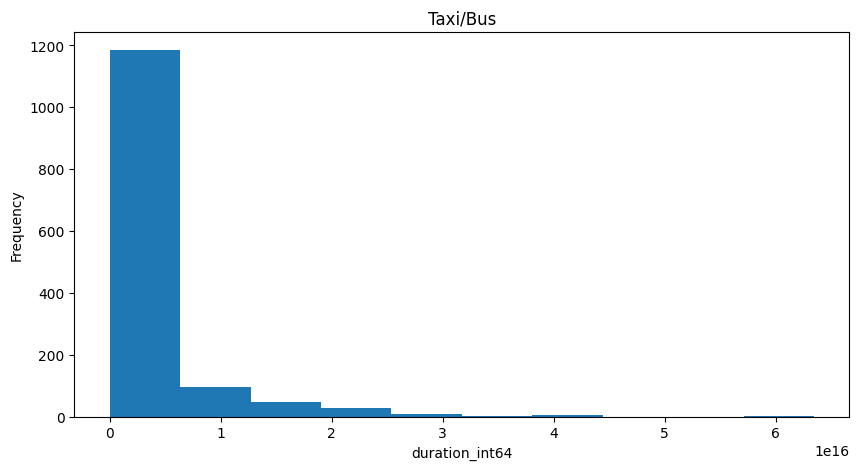

In [104]:
for i in type_list:
    combined_exploded_averages_df_bkk[combined_exploded_averages_df_bkk['type_eng'] == type_mapper[i]]['duration_int64'].plot(kind='hist', title=type_mapper[i], figsize=(10, 5), xlabel='duration_int64')
    # print(i)
    break

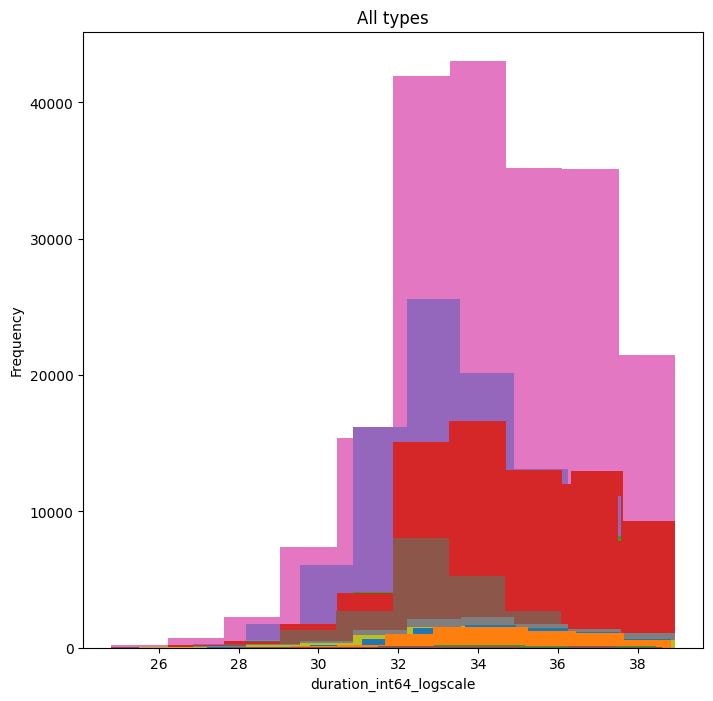

In [103]:
for i in type_list:
    fig = combined_exploded_averages_df_bkk[combined_exploded_averages_df_bkk['type_eng'] == type_mapper[i]]['duration_int64_logscale'].plot(kind='hist', figsize=(8, 8), xlabel='duration_int64_logscale')
    # print(i)
    # break
fig.set_title('All types')
plt.show()

In [109]:
# for i in type_list:
#     plt.figure(figsize=(4, 4))
#     combined_exploded_averages_df_bkk[combined_exploded_averages_df_bkk['type_eng'] == type_mapper[i]]['duration_int64_logscale'].plot(kind='hist', title=type_mapper[i], figsize=(4, 4), xlabel='duration_int64_logscale') 

# This works but the plots are too separated

### Some other thing idk

# Other Stuff 2